In [1]:
%load_ext autoreload
%autoreload 2

In [22]:
# import sys
# sys.path.append("..")

from typing import List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from helpers.categories import get_categories_dict
from helpers.files import save_csv, load_csv
from helpers.json_helper import load_tokenized_text, save_frequent_tokens_dict

In [19]:
gb_non_videos, us_non_videos = load_csv("ped5_non_trending")
videos = pd.concat([gb_non_videos, us_non_videos])
videos.rename(columns={"category_id": "new_category_id"}, inplace=True)

In [ ]:
tokenized_attrs = ["channel_titles", "descriptions", "ocr_text", "titles", "domains", "filtered_ocr_text"]

# country = ???
for attr in tokenized_attrs:
    tokenized = load_tokenized_text(f"{country}_grouped_{attr}")
    videos[f"tokenized_{attr}"] = tokenized
    videos[f"tokenized_{attr}"] = videos[f"tokenized_{attr}"].apply(lambda x: x[-1] if x else [])

In [23]:
categories_ids = pd.unique(videos["new_category_id"])

categories_dict = get_categories_dict()
categories = [categories_dict[x] for x in categories_ids if not np.isnan(x)]
videos["category_name"] = videos["new_category_id"].apply(lambda x: np.nan if np.isnan(x) else categories_dict[x])
print(categories_ids)
print(categories)

[24 22 17 10 26 20  1 25 23 19 27 15 28  2 29]
['Entertainment', 'People & Blogs', 'Sports', 'Music', 'Howto & Style', 'Gaming', 'Film & Animation', 'News & Politics', 'Comedy', 'Travel & Events', 'Education', 'Pets & Animals', 'Science & Technology', 'Autos & Vehicles', 'Nonprofits & Activism']


In [24]:
most_frequent_tokens = dict()

In [28]:
def plot_categories_bars(
        categories: List[str], attr: str, n_frequent: int = 50, create_tokens_dict: bool = True, n_tokens: int = 20
) -> None:
    category_tokens = dict()
    for cat in categories:
        data = videos[videos["category_name"] == cat]
        words = data[f"tokenized_{attr}"].explode().dropna()
        words_counts = words.value_counts()
        words_counts = words_counts.rename_axis("words").reset_index(name="count")
        category_tokens[cat] = words_counts["words"].head(n_tokens).tolist()
        print(f"Category '{cat}' Attr: '{attr}' unique words: {len(words_counts)}")
        wh = words_counts.head(n_frequent)
        # plt.subplots(figsize=(18, 5))
        # plt.bar(wh["words"], wh["count"])
        # plt.title(cat)
        # plt.xticks(rotation=270, fontsize=15)
        # plt.show()
    if create_tokens_dict:
        most_frequent_tokens[attr] = category_tokens


In [29]:
plot_categories_bars(categories, "channel_titles")

TypeError: Must pass list-like as `names`.

In [15]:
from imgprocessing.image_size import ImageSize

data_path = "youtube_grouped_by_id"
gb_videos = pd.read_csv(os.path.join(data_path, "GB_videos_5p.csv"), sep=";", index_col=0)
us_videos = pd.read_csv(os.path.join(data_path, "US_videos_5p.csv"), sep=";", index_col=0)
videos = pd.concat([gb_videos, us_videos])
videos = videos.rename(columns={"description ":"description"})
videos.head(10)

size = ImageSize.hqdefault.default
images_path = os.path.join("images")
gb_images = pd.read_csv(os.path.join(images_path, f"GB_{size}.csv"), sep=";", index_col=0)
us_images = pd.read_csv(os.path.join(images_path, f"US_{size}.csv"), sep=";", index_col=0)

videos_images = pd.concat([gb_images, us_images])
videos_images = videos_images.rename(columns={"description ":"description"})
videos_images.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'youtube_grouped_by_id/GB_videos_5p.csv'

images/default/1_GB_-3VBPAZPTQI_0.jpg


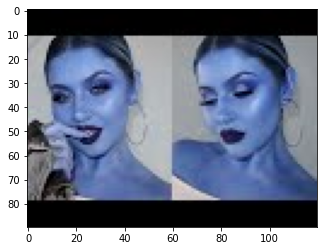

In [36]:
###### test cell
from helpers.files import save_csv, load_csv
import pandas as pd
import cv2

# df = pd.DataFrame()

df = load_csv('images_data')
# df.head(10)
df[0]
path = eval(df[0].iloc[1,3])[0]

path = path.replace("maxres","").replace("\\","/")
print(path)
img = cv2.imread(path)
# print(img)

# print(img.shape)
plt.imshow(img)
plt.show()


In [37]:
df[0]

,number,id,count,thumbnail_path,error,status,obj_names,obj_scores,ocr_texts,emotions,colors,cropped_colors
0,0,--uXQQ0h-yQ,9,['ERROR'],[True],[404],[],[],NaN,[],[],[]
1,1,-3VBPAZPTQI,14,['images\\maxresdefault\\1_GB_-3VBPAZPTQI_0.jpg'],[False],[200],"['person', 'person']","[0.9412501, 0.8961376]",\n\n \n,['happy'],"[([(175, 95, 95), 'IndianRed'], 7588.0), ([(17...","[([(128, 128, 128), 'Gray'], 9942.0), ([(192, ..."
2,2,-43MBOJnVks,2,['images\\maxresdefault\\2_GB_-43MBOJnVks_0.jpg'],[False],[200],['person'],[0.82978743],\n,[],"[([(108, 108, 108), 'Grey42'], 8845.0), ([(118...","[([(128, 128, 128), 'Gray'], 20030.0), ([(192,..."
3,3,-5WBCrazSfg,10,['images\\maxresdefault\\3_GB_-5WBCrazSfg_0.jpg'],[False],[200],['person'],[0.8106267],\n\n \n\nDREAM 5A SIDE\n,['happy'],"[([(8, 8, 8), 'Grey3'], 9019.0), ([(18, 18, 18...","[([(0, 0, 0), 'Black'], 6960.0), ([(192, 192, ..."
4,4,-5aaJJQFvOg,34,['images\\maxresdefault\\4_GB_-5aaJJQFvOg_0.jpg'],[False],[200],"['person', 'person', 'person', 'person', 'pers...","[0.8760423, 0.72684914, 0.66787523, 0.63907856...",\n,"['neutral', 'sad', 'happy', 'happy', 'happy']","[([(18, 18, 18), 'Grey7'], 4862.0), ([(28, 28,...","[([(192, 192, 192), 'Silver'], 7417.0), ([(0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
3267,3267,zwEn-ambXLw,15,['ERROR'],[True],[404],[],[],NaN,[],[],[]
3268,3268,zwrlJwed2mQ,7,['ERROR'],[True],[404],[],[],NaN,[],[],[]
3269,3269,zxGg8QqWrRQ,5,['ERROR'],[True],[404],[],[],NaN,[],[],[]
3270,3270,zxjv0lo8bU8,17,['images\\maxresdefault\\3270_GB_zxjv0lo8bU8_0...,[False],[200],"['person', 'person', 'person', 'person', 'pers...","[0.8213485, 0.79210275, 0.69481397, 0.5880165,...",\n \n\nND\n\n \n,"['neutral', 'happy']","[([(0, 128, 128), 'Teal'], 14844.0), ([(95, 13...","[([(0, 128, 128), 'Teal'], 5707.0), ([(0, 0, 0..."


In [60]:
import numpy as np
from helpers.image_features import *
gb = df[0]
gb["gray_mean_score"] = np.nan
gb["color_mean_score"] = np.nan
gb["gray_hist_score"] = np.nan
gb["red_hist_score"] = np.nan
gb["green_hist_score"] = np.nan
gb["blue_hist_score"] = np.nan
gb["edges_score"] = np.nan
gb["entropy_score"] = np.nan
gb["vevo"] = np.nan


In [68]:
data = gb
for index in range(data.shape[0]):
# for index in range(100):
    if not eval(data["error"].iloc[index])[0]:
        image_path = eval(data["thumbnail_path"].iloc[index])[0]
        low_path = image_path.replace("maxres","").replace("\\","/")
        img = cv2.imread(low_path)
        if (img is None) or (img.shape[:2] != (90,120)): continue
        img = img[11:-11,:]
        
        data["gray_mean_score"].iloc[index] = get_gray_score(img)
        data["color_mean_score"].iloc[index] = get_color_score(img)

        gr,cols = get_hist_score(img)
        r,g,b = cols
        data["gray_hist_score"].iloc[index] = gr
        data["red_hist_score"].iloc[index] = r
        data["green_hist_score"].iloc[index] = g
        data["blue_hist_score"].iloc[index] = b

        data["edges_score"].iloc[index] = get_edges_score(img)
        data["entropy_score"].iloc[index] = get_entr_score(img)

        ocr = data["ocr_texts"].iloc[index]
        # if (get_vevo(ocr)): print(ocr)
        data["vevo"].iloc[index] = get_vevo(ocr)



/home/michal/.virtualenvs/ml/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [72]:
gb

,number,id,count,thumbnail_path,error,status,obj_names,obj_scores,ocr_texts,emotions,...,cropped_colors,gray_mean_score,color_mean_score,gray_hist_score,red_hist_score,blue_hist_score,green_hist_score,edges_score,entropy_score,vevo
0,0,--uXQQ0h-yQ,9,['ERROR'],[True],[404],[],[],NaN,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,-3VBPAZPTQI,14,['images\\maxresdefault\\1_GB_-3VBPAZPTQI_0.jpg'],[False],[200],"['person', 'person']","[0.9412501, 0.8961376]",\n\n \n,['happy'],...,"[([(128, 128, 128), 'Gray'], 9942.0), ([(192, ...",677011.0,1059547.0,7528.493164,6340.199219,8070.468750,7190.877441,1679380.0,229.423865,False
2,2,-43MBOJnVks,2,['images\\maxresdefault\\2_GB_-43MBOJnVks_0.jpg'],[False],[200],['person'],[0.82978743],\n,[],...,"[([(128, 128, 128), 'Gray'], 20030.0), ([(192,...",731162.0,929237.0,10034.464844,10189.420898,9671.904297,10285.122070,1679979.0,189.044617,False
3,3,-5WBCrazSfg,10,['images\\maxresdefault\\3_GB_-5WBCrazSfg_0.jpg'],[False],[200],['person'],[0.8106267],\n\n \n\nDREAM 5A SIDE\n,['happy'],...,"[([(0, 0, 0), 'Black'], 6960.0), ([(192, 192, ...",1106584.0,1066455.0,3193.248535,3506.831543,2391.112305,3053.784180,1678959.0,218.189223,False
4,4,-5aaJJQFvOg,34,['images\\maxresdefault\\4_GB_-5aaJJQFvOg_0.jpg'],[False],[200],"['person', 'person', 'person', 'person', 'pers...","[0.8760423, 0.72684914, 0.66787523, 0.63907856...",\n,"['neutral', 'sad', 'happy', 'happy', 'happy']",...,"[([(192, 192, 192), 'Silver'], 7417.0), ([(0, ...",1027255.0,1088156.0,3954.434814,3531.219727,5565.095215,4178.567871,1679064.0,264.295847,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,3267,zwEn-ambXLw,15,['ERROR'],[True],[404],[],[],NaN,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3268,3268,zwrlJwed2mQ,7,['ERROR'],[True],[404],[],[],NaN,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3269,3269,zxGg8QqWrRQ,5,['ERROR'],[True],[404],[],[],NaN,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3270,3270,zxjv0lo8bU8,17,['images\\maxresdefault\\3270_GB_zxjv0lo8bU8_0...,[False],[200],"['person', 'person', 'person', 'person', 'pers...","[0.8213485, 0.79210275, 0.69481397, 0.5880165,...",\n \n\nND\n\n \n,"['neutral', 'happy']",...,"[([(0, 128, 128), 'Teal'], 5707.0), ([(0, 0, 0...",1324178.0,1205704.0,5601.539551,5709.069824,3353.506836,5538.781738,1678971.0,382.157305,False


In [73]:
us = df[1]
us["gray_mean_score"] = np.nan
us["color_mean_score"] = np.nan
us["gray_hist_score"] = np.nan
us["red_hist_score"] = np.nan
us["green_hist_score"] = np.nan
us["blue_hist_score"] = np.nan
us["edges_score"] = np.nan
us["entropy_score"] = np.nan
us["vevo"] = np.nan


In [82]:
data = us
for index in range(data.shape[0]):
# for index in range(100):
    if not eval(data["error"].iloc[index])[0]:
        image_path = eval(data["thumbnail_path"].iloc[index])[0]
        low_path = image_path.replace("maxres","").replace("\\","/")
        img = cv2.imread(low_path)
        if (img is None) or (img.shape[:2] != (90,120)): continue
        img = img[11:-11,:]
        
        data["gray_mean_score"].iloc[index] = get_gray_score(img)
        data["color_mean_score"].iloc[index] = get_color_score(img)

        gr,cols = get_hist_score(img)
        r,g,b = cols
        data["gray_hist_score"].iloc[index] = gr
        data["red_hist_score"].iloc[index] = r
        data["green_hist_score"].iloc[index] = g
        data["blue_hist_score"].iloc[index] = b

        data["edges_score"].iloc[index] = get_edges_score(img)
        data["entropy_score"].iloc[index] = get_entr_score(img)

        ocr = data["ocr_texts"].iloc[index]
        # if (get_vevo(ocr)): print(ocr)
        data["vevo"].iloc[index] = get_vevo(ocr)

/home/michal/.virtualenvs/ml/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [83]:
us

,number,id,count,thumbnail_path,error,status,obj_names,obj_scores,ocr_texts,emotions,...,cropped_colors,gray_mean_score,color_mean_score,gray_hist_score,red_hist_score,green_hist_score,blue_hist_score,edges_score,entropy_score,vevo
0,0,-0CMnp02rNY,6,['images\\maxresdefault\\0_US_-0CMnp02rNY_0.jpg'],[False],[200],"['person', 'vase', 'dining table', 'chair', 'c...","[0.8474514, 0.78692806, 0.71544576, 0.63851637...",\n,['sad'],...,"[([(192, 192, 192), 'Silver'], 7159.0), ([(128...",1021316.0,1033146.0,3622.848145,5218.964355,4109.290527,2019.384644,1678611.0,287.906532,False
1,1,-0NYY8cqdiQ,1,['images\\maxresdefault\\1_US_-0NYY8cqdiQ_0.jpg'],[False],[200],"['person', 'dining table', 'potted plant', 'cu...","[0.7430678, 0.7036239, 0.65280753, 0.61946386,...",\n,[],...,"[([(192, 192, 192), 'Silver'], 6262.0), ([(0, ...",1020894.0,995668.0,4376.873047,5956.433594,4729.206055,2952.307129,1678915.0,280.164855,False
2,2,-1Hm41N0dUs,3,['images\\maxresdefault\\2_US_-1Hm41N0dUs_0.jpg'],[False],[200],"['person', 'person']","[0.79671276, 0.7358824]",\n,['happy'],...,"[([(192, 192, 192), 'Silver'], 6733.0), ([(128...",1186384.0,1090669.0,4591.179199,4857.143555,4557.974609,4017.319336,1679340.0,263.438737,False
3,3,-1yT-K3c6YI,4,['images\\maxresdefault\\3_US_-1yT-K3c6YI_0.jpg'],[False],[200],['person'],[0.85720253],\n,"['happy', 'happy']",...,"[([(192, 192, 192), 'Silver'], 7204.0), ([(0, ...",974135.0,957931.0,4858.815430,4915.597656,4217.339355,5092.340820,1678575.0,286.422148,False
4,4,-2RVw2_QyxQ,3,['images\\maxresdefault\\4_US_-2RVw2_QyxQ_0.jpg'],[False],[200],"['person', 'person', 'person', 'person', 'pers...","[0.8773748, 0.8426751, 0.8256461, 0.7925309, 0...",\n\nre Champions\nMoy\n\ng°\noe\n,"['happy', 'happy', 'neutral', 'neutral', 'neut...",...,"[([(0, 128, 128), 'Teal'], 6771.0), ([(128, 12...",1348094.0,1238395.0,7183.718262,7029.458496,7078.501465,6474.375977,1679281.0,328.215879,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6349,6346,zwEn-ambXLw,12,['ERROR'],[True],[404],[],[],NaN,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6350,6347,zxUwbflE1SY,5,['images\\maxresdefault\\6347_US_zxUwbflE1SY_0...,[False],[200],['person'],[0.93280447],\n,['angry'],...,"[([(192, 192, 192), 'Silver'], 12092.0), ([(12...",738024.0,1398640.0,10125.994141,10218.792969,10154.467773,10085.324219,1679749.0,855.406132,False
6351,6348,zxwfDlhJIpw,23,['ERROR'],[True],[404],[],[],NaN,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6352,6349,zy0b9e40tK8,1,['ERROR'],[True],[404],[],[],NaN,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
df[0]

,number,id,count,thumbnail_path,error,status,obj_names,obj_scores,ocr_texts,emotions,...,cropped_colors,gray_mean_score,color_mean_score,gray_hist_score,red_hist_score,blue_hist_score,green_hist_score,edges_score,entropy_score,vevo
0,0,--uXQQ0h-yQ,9,['ERROR'],[True],[404],[],[],NaN,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,-3VBPAZPTQI,14,['images\\maxresdefault\\1_GB_-3VBPAZPTQI_0.jpg'],[False],[200],"['person', 'person']","[0.9412501, 0.8961376]",\n\n \n,['happy'],...,"[([(128, 128, 128), 'Gray'], 9942.0), ([(192, ...",677011.0,1059547.0,7528.493164,6340.199219,8070.468750,7190.877441,1679380.0,229.423865,False
2,2,-43MBOJnVks,2,['images\\maxresdefault\\2_GB_-43MBOJnVks_0.jpg'],[False],[200],['person'],[0.82978743],\n,[],...,"[([(128, 128, 128), 'Gray'], 20030.0), ([(192,...",731162.0,929237.0,10034.464844,10189.420898,9671.904297,10285.122070,1679979.0,189.044617,False
3,3,-5WBCrazSfg,10,['images\\maxresdefault\\3_GB_-5WBCrazSfg_0.jpg'],[False],[200],['person'],[0.8106267],\n\n \n\nDREAM 5A SIDE\n,['happy'],...,"[([(0, 0, 0), 'Black'], 6960.0), ([(192, 192, ...",1106584.0,1066455.0,3193.248535,3506.831543,2391.112305,3053.784180,1678959.0,218.189223,False
4,4,-5aaJJQFvOg,34,['images\\maxresdefault\\4_GB_-5aaJJQFvOg_0.jpg'],[False],[200],"['person', 'person', 'person', 'person', 'pers...","[0.8760423, 0.72684914, 0.66787523, 0.63907856...",\n,"['neutral', 'sad', 'happy', 'happy', 'happy']",...,"[([(192, 192, 192), 'Silver'], 7417.0), ([(0, ...",1027255.0,1088156.0,3954.434814,3531.219727,5565.095215,4178.567871,1679064.0,264.295847,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,3267,zwEn-ambXLw,15,['ERROR'],[True],[404],[],[],NaN,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3268,3268,zwrlJwed2mQ,7,['ERROR'],[True],[404],[],[],NaN,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3269,3269,zxGg8QqWrRQ,5,['ERROR'],[True],[404],[],[],NaN,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3270,3270,zxjv0lo8bU8,17,['images\\maxresdefault\\3270_GB_zxjv0lo8bU8_0...,[False],[200],"['person', 'person', 'person', 'person', 'pers...","[0.8213485, 0.79210275, 0.69481397, 0.5880165,...",\n \n\nND\n\n \n,"['neutral', 'happy']",...,"[([(0, 128, 128), 'Teal'], 5707.0), ([(0, 0, 0...",1324178.0,1205704.0,5601.539551,5709.069824,3353.506836,5538.781738,1678971.0,382.157305,False


In [85]:
df[1]

,number,id,count,thumbnail_path,error,status,obj_names,obj_scores,ocr_texts,emotions,...,cropped_colors,gray_mean_score,color_mean_score,gray_hist_score,red_hist_score,green_hist_score,blue_hist_score,edges_score,entropy_score,vevo
0,0,-0CMnp02rNY,6,['images\\maxresdefault\\0_US_-0CMnp02rNY_0.jpg'],[False],[200],"['person', 'vase', 'dining table', 'chair', 'c...","[0.8474514, 0.78692806, 0.71544576, 0.63851637...",\n,['sad'],...,"[([(192, 192, 192), 'Silver'], 7159.0), ([(128...",1021316.0,1033146.0,3622.848145,5218.964355,4109.290527,2019.384644,1678611.0,287.906532,False
1,1,-0NYY8cqdiQ,1,['images\\maxresdefault\\1_US_-0NYY8cqdiQ_0.jpg'],[False],[200],"['person', 'dining table', 'potted plant', 'cu...","[0.7430678, 0.7036239, 0.65280753, 0.61946386,...",\n,[],...,"[([(192, 192, 192), 'Silver'], 6262.0), ([(0, ...",1020894.0,995668.0,4376.873047,5956.433594,4729.206055,2952.307129,1678915.0,280.164855,False
2,2,-1Hm41N0dUs,3,['images\\maxresdefault\\2_US_-1Hm41N0dUs_0.jpg'],[False],[200],"['person', 'person']","[0.79671276, 0.7358824]",\n,['happy'],...,"[([(192, 192, 192), 'Silver'], 6733.0), ([(128...",1186384.0,1090669.0,4591.179199,4857.143555,4557.974609,4017.319336,1679340.0,263.438737,False
3,3,-1yT-K3c6YI,4,['images\\maxresdefault\\3_US_-1yT-K3c6YI_0.jpg'],[False],[200],['person'],[0.85720253],\n,"['happy', 'happy']",...,"[([(192, 192, 192), 'Silver'], 7204.0), ([(0, ...",974135.0,957931.0,4858.815430,4915.597656,4217.339355,5092.340820,1678575.0,286.422148,False
4,4,-2RVw2_QyxQ,3,['images\\maxresdefault\\4_US_-2RVw2_QyxQ_0.jpg'],[False],[200],"['person', 'person', 'person', 'person', 'pers...","[0.8773748, 0.8426751, 0.8256461, 0.7925309, 0...",\n\nre Champions\nMoy\n\ng°\noe\n,"['happy', 'happy', 'neutral', 'neutral', 'neut...",...,"[([(0, 128, 128), 'Teal'], 6771.0), ([(128, 12...",1348094.0,1238395.0,7183.718262,7029.458496,7078.501465,6474.375977,1679281.0,328.215879,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6349,6346,zwEn-ambXLw,12,['ERROR'],[True],[404],[],[],NaN,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6350,6347,zxUwbflE1SY,5,['images\\maxresdefault\\6347_US_zxUwbflE1SY_0...,[False],[200],['person'],[0.93280447],\n,['angry'],...,"[([(192, 192, 192), 'Silver'], 12092.0), ([(12...",738024.0,1398640.0,10125.994141,10218.792969,10154.467773,10085.324219,1679749.0,855.406132,False
6351,6348,zxwfDlhJIpw,23,['ERROR'],[True],[404],[],[],NaN,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6352,6349,zy0b9e40tK8,1,['ERROR'],[True],[404],[],[],NaN,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
save_csv('reference_images',df,['GB_images_data','US_images_data'])
save_csv('images_data',df,['GB_images_data','US_images_data'])

In [88]:
df2 = load_csv('images_data')

In [89]:
df2[0]

,number,id,count,thumbnail_path,error,status,obj_names,obj_scores,ocr_texts,emotions,...,cropped_colors,gray_mean_score,color_mean_score,gray_hist_score,red_hist_score,blue_hist_score,green_hist_score,edges_score,entropy_score,vevo
0,0,--uXQQ0h-yQ,9,['ERROR'],[True],[404],[],[],NaN,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,-3VBPAZPTQI,14,['images\\maxresdefault\\1_GB_-3VBPAZPTQI_0.jpg'],[False],[200],"['person', 'person']","[0.9412501, 0.8961376]",\n\n \n,['happy'],...,"[([(128, 128, 128), 'Gray'], 9942.0), ([(192, ...",677011.0,1059547.0,7528.493164,6340.199219,8070.468750,7190.877441,1679380.0,229.423865,False
2,2,-43MBOJnVks,2,['images\\maxresdefault\\2_GB_-43MBOJnVks_0.jpg'],[False],[200],['person'],[0.82978743],\n,[],...,"[([(128, 128, 128), 'Gray'], 20030.0), ([(192,...",731162.0,929237.0,10034.464844,10189.420898,9671.904297,10285.122070,1679979.0,189.044617,False
3,3,-5WBCrazSfg,10,['images\\maxresdefault\\3_GB_-5WBCrazSfg_0.jpg'],[False],[200],['person'],[0.8106267],\n\n \n\nDREAM 5A SIDE\n,['happy'],...,"[([(0, 0, 0), 'Black'], 6960.0), ([(192, 192, ...",1106584.0,1066455.0,3193.248535,3506.831543,2391.112305,3053.784180,1678959.0,218.189223,False
4,4,-5aaJJQFvOg,34,['images\\maxresdefault\\4_GB_-5aaJJQFvOg_0.jpg'],[False],[200],"['person', 'person', 'person', 'person', 'pers...","[0.8760423, 0.72684914, 0.66787523, 0.63907856...",\n,"['neutral', 'sad', 'happy', 'happy', 'happy']",...,"[([(192, 192, 192), 'Silver'], 7417.0), ([(0, ...",1027255.0,1088156.0,3954.434814,3531.219727,5565.095215,4178.567871,1679064.0,264.295847,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,3267,zwEn-ambXLw,15,['ERROR'],[True],[404],[],[],NaN,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3268,3268,zwrlJwed2mQ,7,['ERROR'],[True],[404],[],[],NaN,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3269,3269,zxGg8QqWrRQ,5,['ERROR'],[True],[404],[],[],NaN,[],...,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3270,3270,zxjv0lo8bU8,17,['images\\maxresdefault\\3270_GB_zxjv0lo8bU8_0...,[False],[200],"['person', 'person', 'person', 'person', 'pers...","[0.8213485, 0.79210275, 0.69481397, 0.5880165,...",\n \n\nND\n\n \n,"['neutral', 'happy']",...,"[([(0, 128, 128), 'Teal'], 5707.0), ([(0, 0, 0...",1324178.0,1205704.0,5601.539551,5709.069824,3353.506836,5538.781738,1678971.0,382.157305,False
